# Normalization Notebook
In this notebook I normalize the whole dataset so that we do not need to do it on the fly when training the model
Below I also test some of the transforms that were generated

In [1]:
from embed_time.transforms import complex_normalisation
import os
import skimage.io as io

data_location = "/mnt/efs/dlmbl/G-et/data/live-TLS"

folder_imgs = data_location +"/"+'Control_Dataset_4TP'
metadata = data_location + "/" +'Control_Dataset_4TP_Ground_Truth'
out_normalised = data_location + "/" +'Control_Dataset_4TP_Normalized'
if not os.path.isdir(out_normalised):
    os.mkdir(out_normalised)

img_list = [path for path in os.listdir(folder_imgs) if path.endswith(".tif")]
img_list


['CTRLD_TR_PLATE_2_ID_G9.tif',
 'CTRLD_RR_PLATE_6_ID_E9.tif',
 'CTRLD_RR_PLATE_1_ID_B10.tif',
 'CTRLD_RR_PLATE_4_ID_G9.tif',
 'CTRLD_RR_PLATE_1_ID_B1.tif',
 'CTRLD_RR_PLATE_1_ID_A2.tif',
 'CTRLD_RR_PLATE_4_ID_H8.tif',
 'CTRLD_RR_PLATE_6_ID_H6.tif',
 'CTRLD_TR_PLATE_1_ID_H9.tif',
 'CTRLD_RR_PLATE_1_ID_H3.tif',
 'CTRLD_RR_PLATE_4_ID_F2.tif',
 'CTRLD_TR_PLATE_2_ID_D4.tif',
 'CTRLD_TR_PLATE_1_ID_H10.tif',
 'CTRLD_TR_PLATE_1_ID_B7.tif',
 'CTRLD_TR_PLATE_1_ID_F12.tif',
 'CTRLD_RR_PLATE_4_ID_B6.tif',
 'CTRLD_RR_PLATE_1_ID_D7.tif',
 'CTRLD_TR_PLATE_1_ID_F3.tif',
 'CTRLD_RR_PLATE_1_ID_B9.tif',
 'CTRLD_TR_PLATE_1_ID_D5.tif',
 'CTRLD_TR_PLATE_1_ID_G11.tif',
 'CTRLD_TR_PLATE_2_ID_B6.tif',
 'CTRLD_RR_PLATE_1_ID_F5.tif',
 'CTRLD_RR_PLATE_6_ID_C12.tif',
 'CTRLD_RR_PLATE_4_ID_G1.tif',
 'CTRLD_TR_PLATE_2_ID_E3.tif',
 'CTRLD_RR_PLATE_6_ID_C3.tif',
 'CTRLD_TR_PLATE_2_ID_E12.tif',
 'CTRLD_TR_PLATE_1_ID_C6.tif',
 'CTRLD_RR_PLATE_6_ID_E10.tif',
 'CTRLD_RR_PLATE_4_ID_C5.tif',
 'CTRLD_RR_PLATE_1_ID_E6.tif',
 

In [2]:
import numpy as np
img = io.imread(folder_imgs+"/"+img_list[0])
img[0][0]

array([[177.58008, 176.13235, 176.82385, ..., 179.91472, 181.3131 ,
        184.23067],
       [176.80244, 176.21324, 175.5107 , ..., 180.11528, 179.73907,
        181.74521],
       [177.29095, 177.8136 , 177.93512, ..., 181.41336, 180.40445,
        181.68164],
       ...,
       [172.38713, 173.02652, 176.30809, ..., 176.55867, 176.17668,
        177.1237 ],
       [175.85606, 174.04015, 174.0906 , ..., 176.68631, 174.81784,
        176.36981],
       [171.52225, 171.794  , 174.14056, ..., 177.49547, 175.22604,
        177.27545]], dtype=float32)

In [3]:
len(np.histogram(img[2][0], )[1])



11

/home/S-rs/miniforge3/envs/embed_time/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


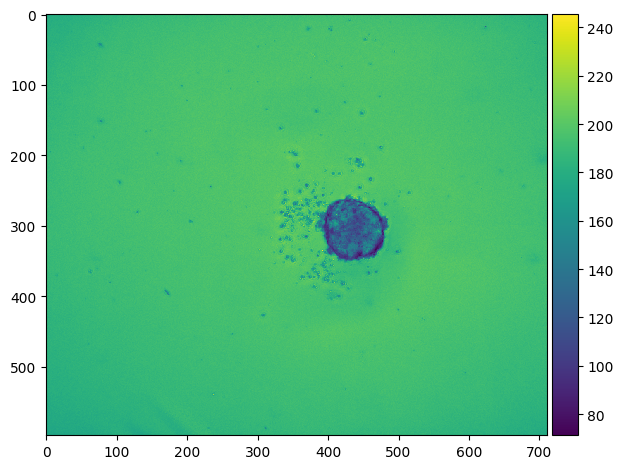

In [4]:
names =[]
BF = []

BF_imgs = []
BRA_imgs = []
BRA = []
for pth in img_list:
    img = io.imread(folder_imgs+"/"+pth)
    names.append(pth)
    BF.append([np.histogram(img[i][0], bins=range(1,256))[0] for i in range(4)])
    BF_imgs.append(img[:,0])
    BRA.append([np.histogram(img[i][1], bins=range(1,256))[0] for i in range(4)])
    BRA_imgs.append(img[:,1])

io.imshow(BF_imgs[0][0])

/home/S-rs/miniforge3/envs/embed_time/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


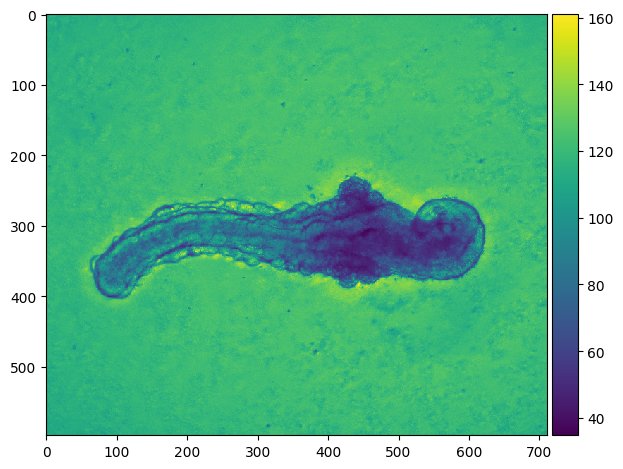

In [5]:
io.imshow(BF_imgs[0][3])

In [6]:
BF = np.array(BF)
BF.shape

(312, 4, 254)

In [7]:
BF_per_timepoint = np.sum(BF,axis=0)
BF_per_timepoint.shape

(4, 254)

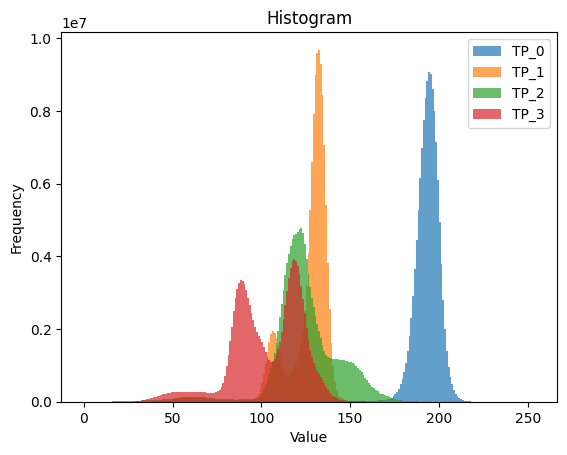

In [8]:
import matplotlib.pyplot as plt

# Calculate bin centers from edges
bin_edges = np.arange(0,255)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram
for i in range(4):
    plt.bar(bin_centers, BF_per_timepoint[i], width=(bin_edges[1] - bin_edges[0]),alpha=0.7,label = f"TP_{i}")#, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()

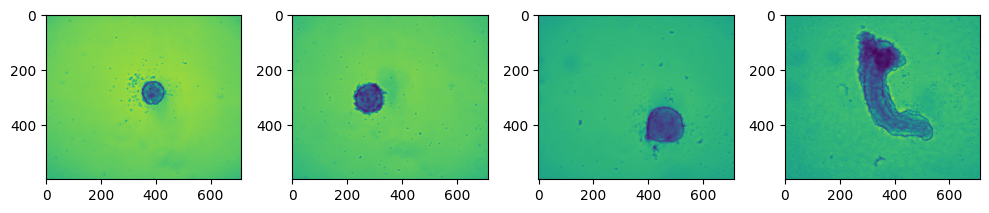

In [9]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,4,figsize=(10,5))
for i,ax in enumerate(axs):
    ax.imshow(img[i][0])
plt.tight_layout()

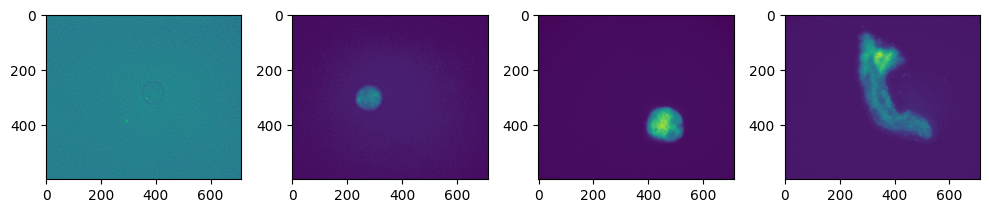

In [10]:
fig,axs = plt.subplots(1,4,figsize=(10,5))
for i,ax in enumerate(axs):
    ax.imshow(img[i][1])
plt.tight_layout()

In [14]:
import pandas as pd
annot_df = pd.read_csv(metadata)
annot_df

,Unnamed: 0,Run,Plate,ID,Morph,Axes,Morph_Class,Image Name
0,0,RR,1,A1,good,single,single_good,CTRLD_RR_PLATE_1_ID_A1.tif
1,1,RR,1,A2,bad,single,single_bad,CTRLD_RR_PLATE_1_ID_A2.tif
2,2,RR,1,A3,bad,single,single_bad,CTRLD_RR_PLATE_1_ID_A3.tif
3,3,RR,1,A4,good,single,single_good,CTRLD_RR_PLATE_1_ID_A4.tif
4,4,RR,1,A5,bad,single,single_bad,CTRLD_RR_PLATE_1_ID_A5.tif
...,...,...,...,...,...,...,...,...
307,307,TR,2,H4,good,single,single_good,CTRLD_TR_PLATE_2_ID_H4.tif
308,308,TR,2,H5,bad,single,single_bad,CTRLD_TR_PLATE_2_ID_H5.tif
309,309,TR,2,H9,good,single,single_good,CTRLD_TR_PLATE_2_ID_H9.tif
310,310,TR,2,H11,good,single,single_good,CTRLD_TR_PLATE_2_ID_H11.tif


In [25]:
from tifffile import imsave
from skimage.exposure import rescale_intensity
out_normalised = data_location + "/" +'Control_Dataset_4TP_Normalized_Across_Plates'
if not os.path.isdir(out_normalised):
    os.mkdir(out_normalised)

 


def rescale_bf(img,quantiles = [0.01,0.99]):
    min_max = np.quantile(img,quantiles)
    rescaled = (
        rescale_intensity(
            img,
            in_range=(min_max[0],min_max[1]),
            out_range=(0,1)) -1
    ) * -1
    rescaled = np.clip(rescaled,0,1)
    return rescaled


group_dict = annot_df.groupby(["Run","Plate"]).groups
for group_key in group_dict.keys():
    indices = group_dict[group_key]
    img_names = annot_df.iloc[indices]["Image Name"].to_numpy()
    all_bra = []
    all_bf = []
    for pth in img_names:
        img = io.imread(folder_imgs+"/"+pth)
        all_bra.append(img[:,1])
        all_bf.append(img[:,0])
    all_bra = np.array(all_bra)
    all_bf = np.array(all_bf)

    quantiles = np.quantile(all_bra,(0.001,0.999)) 
    quantile_scaled = np.clip(rescale_intensity(all_bra,(quantiles[0],quantiles[1]),(0,1)),0,1)
    quantile_scaled = np.expand_dims(quantile_scaled,2)
    
    out_bf = [np.expand_dims(np.array([rescale_bf(img) for img in bf_tl]),1) for bf_tl in all_bf]
        
    for bf_tl, bra_tl, pth in zip(out_bf,quantile_scaled,img_names):
        norm = np.concat((bf_tl,bra_tl),axis=1)
        print(norm.shape)
        imsave(out_normalised+"/"+pth,norm)

    

(4, 2, 598, 712)
(4, 2, 598, 712)


/tmp/ipykernel_28749/2332170940.py:44: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(out_normalised+"/"+pth,norm)


(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 712)
(4, 2, 598, 71